In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Data Collection and Pre-Procssing

In [145]:
# Loadig the data from csv file to a pandas dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [146]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [147]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'') # dont use double quotes here use opening and closing single quote


In [148]:
# Printing the first five rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
# Checking the number of rows and columns
mail_data.shape

(5572, 2)

Label Encoding

In [150]:
# label spam mail as 0; and ham mail as 1;
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam --> 0

ham --> 1

In [151]:
# Seperating the data as texts and labels
X = mail_data['Message']
Y = mail_data['Category']

In [152]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [153]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data and test data

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [155]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extractiion

In [156]:
# Transform the text data to feature vectors that can be used as input to the logistic regression model


# min_df = 1 means if the score of a particular word is less than 1 the we will ignore that word
# stop_words = 'english' means we will ignore all the english words
# lower_case = All words will be in lower case as it is better for the processing
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [157]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the model


In [158]:
logistic_model = LogisticRegression()
naive_bayes_model = GaussianNB()
random_forest_model = RandomForestClassifier()

In [159]:
# Training the logistic regression model with the training data
logistic_model.fit(X_train_features, Y_train)
naive_bayes_model.fit(X_train_features.toarray(), Y_train)
random_forest_model.fit(X_train_features, Y_train)

RandomForestClassifier()

Evaluating the trained model

In [160]:
# Prediction on traing data

predition_training_data_logistic = logistic_model.predict(X_train_features)
accuracy_training_data_logistic = accuracy_score(Y_train, predition_training_data_logistic)

In [161]:
prediction_training_data_naive_bayes = naive_bayes_model.predict(X_train_features.toarray())
accuracy_training_data_naive_bayes = accuracy_score(Y_train, prediction_training_data_naive_bayes)

In [162]:
prediction_training_data_random_forest = random_forest_model.predict(X_train_features)
accuracy_training_data_random_forest = accuracy_score(Y_train, prediction_training_data_random_forest)

In [163]:
print('Accuracy on training data using random forest: ', accuracy_training_data_random_forest)

Accuracy on training data using random forest:  1.0


In [164]:
print('Accuracy on training data using naive bayes: ', accuracy_training_data_naive_bayes)

Accuracy on training data using naive bayes:  0.934709445815571


In [165]:
print('Accuracy on training data using logistic : ', accuracy_training_data_logistic)

Accuracy on training data using logistic :  0.9670181736594121


In [166]:
# Prediction on test data

predition_test_data_logistic = logistic_model.predict(X_test_features)
accuracy_test_data_logistic = accuracy_score(Y_test, predition_test_data_logistic)

In [167]:
prediction_test_data_naive_bayes = naive_bayes_model.predict(X_test_features.toarray())
accuracy_test_data_naive_bayes = accuracy_score(Y_test, prediction_test_data_naive_bayes)

In [168]:
prediction_test_data_random_forest = random_forest_model.predict(X_test_features)
accuracy_test_data_random_forest = accuracy_score(Y_test, prediction_test_data_random_forest)

In [169]:
print('Accuracy Score on test data using random forest: ', accuracy_test_data_random_forest)

Accuracy Score on test data using random forest:  0.9757847533632287


In [170]:
print('Accuracy Score on test data using naivve bayes: ', accuracy_test_data_naive_bayes)

Accuracy Score on test data using naivve bayes:  0.8878923766816144


In [171]:
print('Accuracy Score on test data: ', accuracy_test_data_logistic)

Accuracy Score on test data:  0.9659192825112107


Building a predictive system

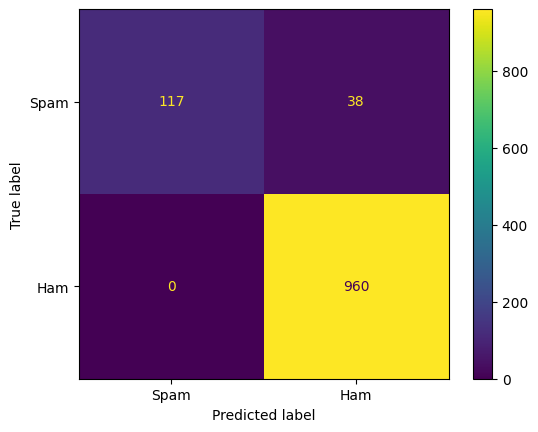

In [172]:
cm = confusion_matrix(Y_test, predition_test_data_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
disp.plot()
plt.show()

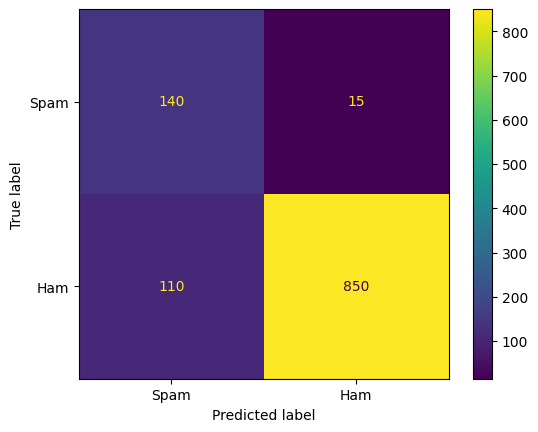

In [173]:
cm = confusion_matrix(Y_test, prediction_test_data_naive_bayes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
disp.plot()
plt.show()

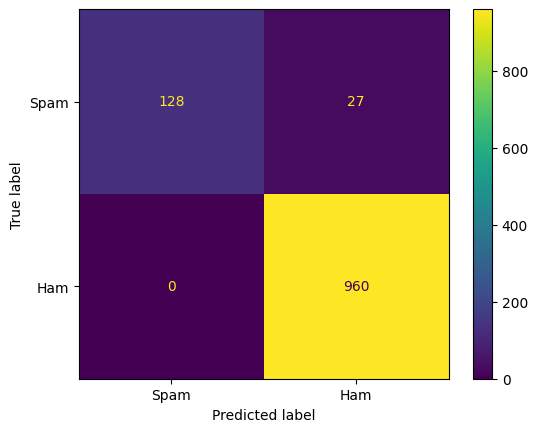

In [174]:
cm = confusion_matrix(Y_test, prediction_test_data_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
disp.plot()
plt.show()

In [176]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making prediction
prediction = random_forest_model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
